# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 572


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
#url = "http://api.openweathermap.org/data/2.5/weather?"

# set up base url
url = "http://api.openweathermap.org/data/2.5/weather?units=imperial&appid=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []
city_list = []
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []
# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = "output_data/cities.csv"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = url + "&q=" + city # YOUR CODE HERE
        response = requests.get(city_weather).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_list.append(response["name"])
        city_lat.append(response["coord"]["lat"]) # YOUR CODE HERE
        city_lng.append(response["coord"]["lon"])  # YOUR CODE HERE
        city_max_temp.append(response["main"]["temp_max"])  # YOUR CODE HERE
        city_humidity.append(response["main"]["humidity"])  # YOUR CODE HERE
        city_clouds.append(response["clouds"]["all"])  # YOUR CODE HERE
        city_wind.append(response["wind"]["speed"])  # YOUR CODE HERE
        city_country.append(response["sys"]["country"])  # YOUR CODE HERE
        city_date.append(response["dt"])  # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | labrador city
Processing Record 2 of Set 1 | pointe-noire
Processing Record 3 of Set 1 | okhotsk
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | el colomo
Processing Record 6 of Set 1 | gondia
Processing Record 7 of Set 1 | samalut
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | college
Processing Record 10 of Set 1 | taiohae
City not found. Skipping...
Processing Record 11 of Set 1 | nueva palestina
Processing Record 12 of Set 1 | ilulissat
Processing Record 13 of Set 1 | feira de santana
Processing Record 14 of Set 1 | edinburgh of the seven seas
Processing Record 15 of Set 1 | lijiang
Processing Record 16 of Set 1 | taulaga
Processing Record 17 of Set 1 | aasiaat
Processing Record 18 of Set 1 | kaliua
Processing Record 19 of Set 1 | luderitz
Processing Record 20 of Set 1 | puerto natales
Processing Record 21 of Set 1 | havre
Processing Record 22 o

Processing Record 40 of Set 4 | peterhead
Processing Record 41 of Set 4 | baley
Processing Record 42 of Set 4 | preobrazheniye
Processing Record 43 of Set 4 | westport
Processing Record 44 of Set 4 | palafrugell
Processing Record 45 of Set 4 | ust'-ilimsk
Processing Record 46 of Set 4 | polyarnyy
Processing Record 47 of Set 4 | wailua homesteads
Processing Record 48 of Set 4 | klyuchi
Processing Record 49 of Set 4 | acarau
Processing Record 0 of Set 5 | amos
Processing Record 1 of Set 5 | newman
Processing Record 2 of Set 5 | mingora
Processing Record 3 of Set 5 | kokpekty
Processing Record 4 of Set 5 | kidal
Processing Record 5 of Set 5 | kiunga
Processing Record 6 of Set 5 | punta arenas
Processing Record 7 of Set 5 | alice springs
Processing Record 8 of Set 5 | st anne
Processing Record 9 of Set 5 | kimamba
Processing Record 10 of Set 5 | babayurt
Processing Record 11 of Set 5 | andilamena
Processing Record 12 of Set 5 | azzaba
Processing Record 13 of Set 5 | tuburan
Processing Reco

Processing Record 35 of Set 8 | murzuq
Processing Record 36 of Set 8 | novodvinsk
Processing Record 37 of Set 8 | chibougamau
Processing Record 38 of Set 8 | ceelbuur
Processing Record 39 of Set 8 | sao bartolomeu de messines
Processing Record 40 of Set 8 | slave lake
Processing Record 41 of Set 8 | tofol
Processing Record 42 of Set 8 | charters towers
Processing Record 43 of Set 8 | andergrove
Processing Record 44 of Set 8 | singleton
Processing Record 45 of Set 8 | madalena
Processing Record 46 of Set 8 | banda aceh
Processing Record 47 of Set 8 | bouarfa
Processing Record 48 of Set 8 | geraldton
Processing Record 49 of Set 8 | burang
Processing Record 0 of Set 9 | alofi
Processing Record 1 of Set 9 | kolonia town
Processing Record 2 of Set 9 | bubaque
Processing Record 3 of Set 9 | sena madureira
Processing Record 4 of Set 9 | aqsay
Processing Record 5 of Set 9 | ribeira brava
Processing Record 6 of Set 9 | mossel bay
Processing Record 7 of Set 9 | necochea
Processing Record 8 of Se

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame({
    "City": city_list,
    "Lat": city_lat,
    "Lng": city_lng,
    "Max Temp": city_max_temp,
    "Humidity": city_humidity,
    "Cloudiness": city_clouds,
    "Wind Speed": city_wind,
    "Country": city_country,
    "Date": city_date
})

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [5]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [6]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Labrador City,52.9463,-66.9114,39.11,52,75,11.50,CA,1684189433
1,Pointe-Noire,-4.7761,11.8635,78.87,94,20,5.75,CG,1684189471
2,Okhotsk,59.3833,143.3000,39.96,74,99,12.84,RU,1684189471
3,Waitangi,-43.9535,-176.5597,57.81,89,43,8.01,NZ,1684189472
4,El Colomo,19.0500,-104.2500,84.18,53,1,8.75,MX,1684189472


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

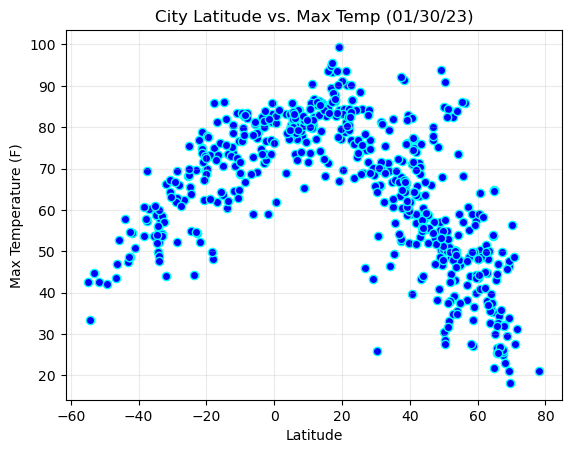

In [7]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor="blue", edgecolor="aqua")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Max Temp (01/30/23)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(alpha=0.25)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

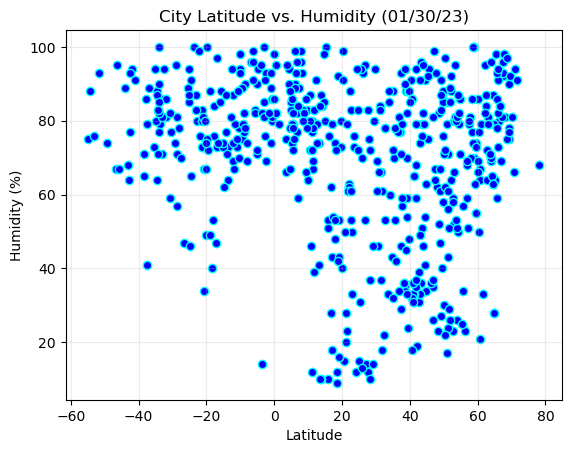

In [8]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor="blue", edgecolor="aqua")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Humidity (01/30/23)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(alpha=0.25)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

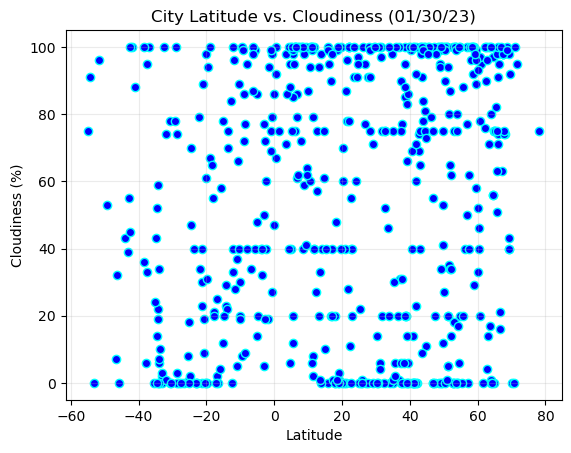

In [9]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], facecolor="blue", edgecolor="aqua")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Cloudiness (01/30/23)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(alpha=0.25)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

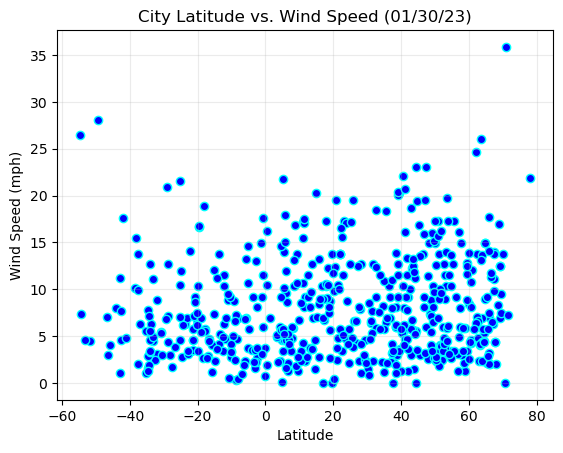

In [10]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], facecolor="blue", edgecolor="aqua")

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title("City Latitude vs. Wind Speed (01/30/23)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(alpha=0.25)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [11]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, :]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Labrador City,52.9463,-66.9114,39.11,52,75,11.50,CA,1684189433
2,Okhotsk,59.3833,143.3000,39.96,74,99,12.84,RU,1684189471
4,El Colomo,19.0500,-104.2500,84.18,53,1,8.75,MX,1684189472
5,Gondiā,21.4500,80.2000,90.18,23,78,4.81,IN,1684189472
6,Samālūţ,28.3121,30.7101,76.87,37,75,12.68,EG,1684189472


In [12]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, :]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Pointe-Noire,-4.7761,11.8635,78.87,94,20,5.75,CG,1684189471
3,Waitangi,-43.9535,-176.5597,57.81,89,43,8.01,NZ,1684189472
11,Feira de Santana,-12.2667,-38.9667,73.80,87,33,6.29,BR,1684189474
12,Edinburgh of the Seven Seas,-37.0676,-12.3116,60.33,89,100,6.29,SH,1684189337
14,Taulaga,-11.0553,-171.0883,83.52,73,5,8.84,AS,1684189475


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6276173092356774
Cities in the northern hemisphere moving farther from the equator, temperatures drop.
This shows a strong negative correlation between latitude and tempuratures in the northern hemisphere.


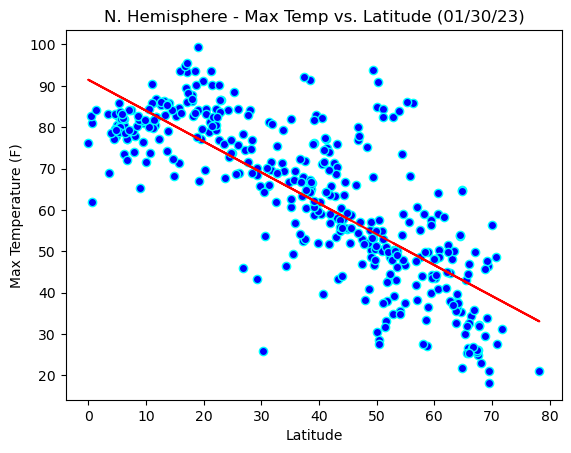

In [13]:
# Linear regression on Northern Hemisphere
x_vals = northern_hemi_df["Lat"]
y_vals = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="blue", edgecolor="aqua")
plt.plot(x_vals,regress_vals,"r-")
plt.title("N. Hemisphere - Max Temp vs. Latitude (01/30/23)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(0,0),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("Cities in the northern hemisphere moving farther from the equator, temperatures drop.")
print("This shows a strong negative correlation between latitude and tempuratures in the northern hemisphere.")
plt.savefig("nhem_temp_v_lat_plot.png")

The r-value is: 0.6341278413305744
Cities in the southern hemisphere moving closer to the equator, temperatures rise.
This shows a slight positive correlation between latitude and temperature in the southern hemisphere.


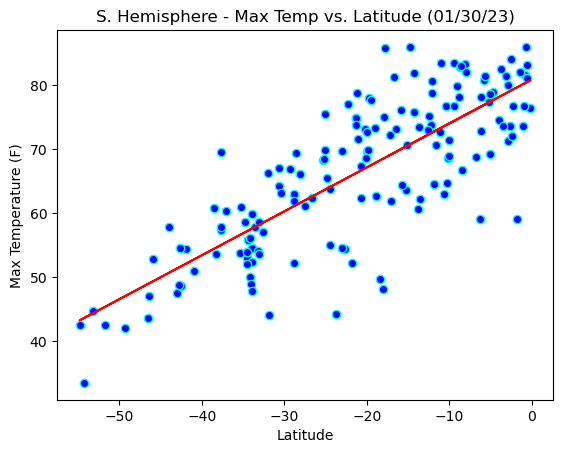

In [14]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_vals = southern_hemi_df["Lat"]
y_vals = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="blue", edgecolor="aqua")
plt.plot(x_vals,regress_vals,"r-")
plt.title("S. Hemisphere - Max Temp vs. Latitude (01/30/23)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(50,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("Cities in the southern hemisphere moving closer to the equator, temperatures rise.")
print("This shows a slight positive correlation between latitude and temperature in the southern hemisphere.")
plt.savefig("shem_temp_v_lat_plot.png")

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0005164843688269141
There is no correlation between humidity and latitude for cities in the northern hemisphere.


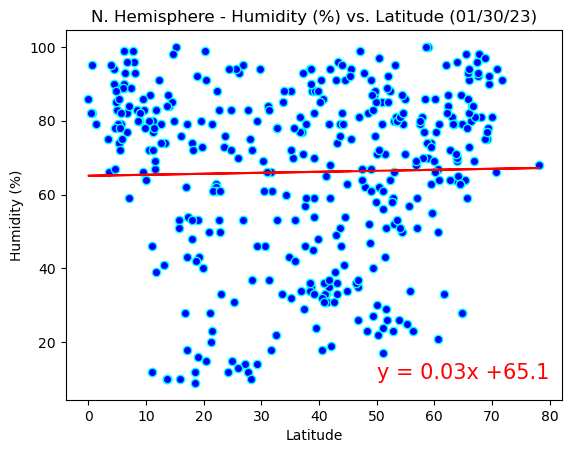

In [15]:
# Northern Hemisphere
# YOUR CODE HERE
x_vals = northern_hemi_df["Lat"]
y_vals = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="blue", edgecolor="aqua")
plt.plot(x_vals,regress_vals,"r-")
plt.title("N. Hemisphere - Humidity (%) vs. Latitude (01/30/23)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(50,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("There is no correlation between humidity and latitude for cities in the northern hemisphere.")

plt.savefig("nhem_humidity_v_lat_plot.png")

The r-value is: 0.6341278413305744
Cities in the southern hemisphere moving closer to the equator, temperatures rise.
This shows a positive correlation between latitude and temperature in the southern hemisphere.


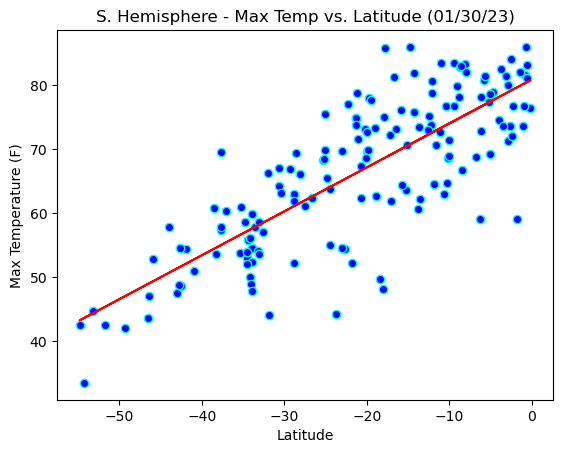

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_vals = southern_hemi_df["Lat"]
y_vals = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="blue", edgecolor="aqua")
plt.plot(x_vals,regress_vals,"r-")
plt.title("S. Hemisphere - Max Temp vs. Latitude (01/30/23)")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.annotate(line_eq,(-55,93),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("Cities in the southern hemisphere moving closer to the equator, temperatures rise.")
print("This shows a positive correlation between latitude and temperature in the southern hemisphere.")
plt.savefig("shem_temp_v_lat_plot.png")

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0005164843688269141
There is a slight positive correlation between humidity and latitude for cities in the northern hemisphere.


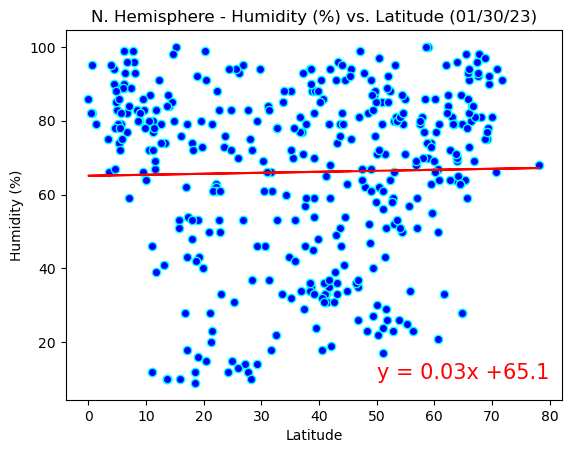

In [17]:
# Northern Hemisphere
# YOUR CODE HERE
x_vals = northern_hemi_df["Lat"]
y_vals = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="blue", edgecolor="aqua")
plt.plot(x_vals,regress_vals,"r-")
plt.title("N. Hemisphere - Humidity (%) vs. Latitude (01/30/23)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(50,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("There is a slight positive correlation between humidity and latitude for cities in the northern hemisphere.")

plt.savefig("nhem_humidity_v_lat_plot.png")

The r-value is: 0.0040387851798047115
There is a slight correlation between humidity and latitude for cities in the southern hemisphere.


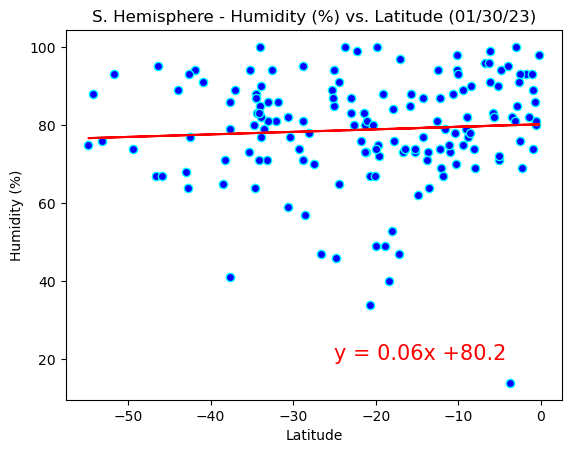

In [18]:
# Southern Hemisphere
# YOUR CODE HERE
x_vals = southern_hemi_df["Lat"]
y_vals = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="blue", edgecolor="aqua")
plt.plot(x_vals,regress_vals,"r-")
plt.title("S. Hemisphere - Humidity (%) vs. Latitude (01/30/23)")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("There is a slight correlation between humidity and latitude for cities in the southern hemisphere.")
plt.savefig("shem_humidity_v_lat_plot.png")

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 6.195829655294283e-06
There is no correlation between cloudiness and latitude for cities in the northern hemisphere.


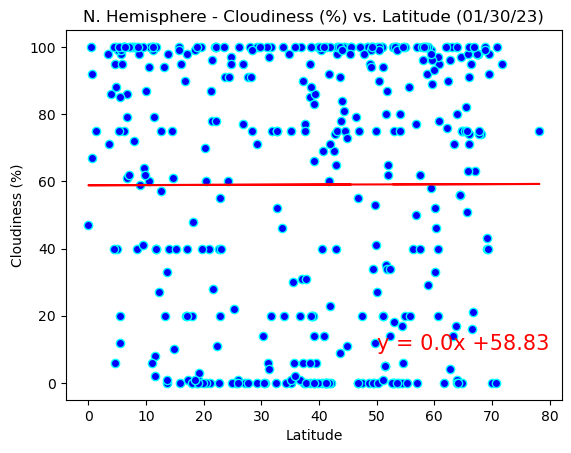

In [19]:
# Northern Hemisphere
# YOUR CODE HERE
x_vals = northern_hemi_df["Lat"]
y_vals = northern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="blue", edgecolor="aqua")
plt.plot(x_vals,regress_vals,"r-")
plt.title("N. Hemisphere - Cloudiness (%) vs. Latitude (01/30/23)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(50,10),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("There is no correlation between cloudiness and latitude for cities in the northern hemisphere.")

plt.savefig("nhem_cloudiness_v_lat_plot.png")

The r-value is: 0.024197005511135516
There is a correlation between cloudiness and latitude for cities in the southern hemisphere.


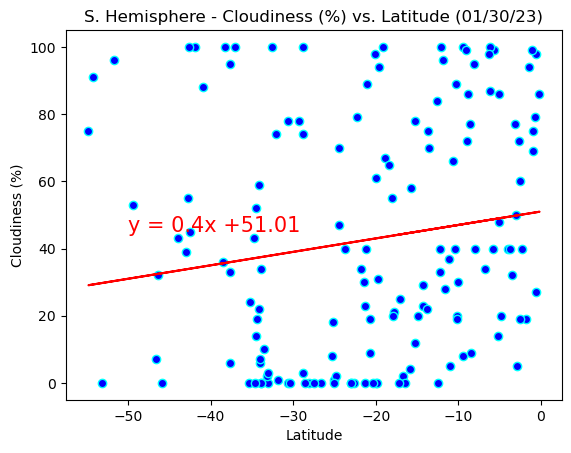

In [20]:
# Southern Hemisphere
# YOUR CODE HERE
x_vals = southern_hemi_df["Lat"]
y_vals = southern_hemi_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="blue", edgecolor="aqua")
plt.plot(x_vals,regress_vals,"r-")
plt.title("S. Hemisphere - Cloudiness (%) vs. Latitude (01/30/23)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(-50,45),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("There is a correlation between cloudiness and latitude for cities in the southern hemisphere.")

plt.savefig("shem_cloudiness_v_lat_plot.png")

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.005132984784061184
There is a little correlation between wind speed and latitude for cities in the northern hemisphere.


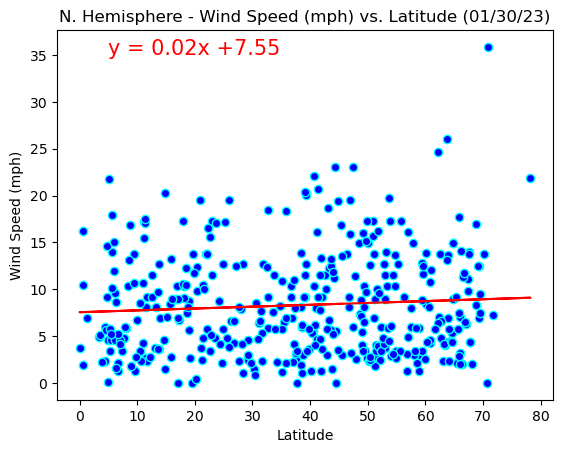

In [21]:
# Northern Hemisphere
# YOUR CODE HERE
x_vals = northern_hemi_df["Lat"]
y_vals = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="blue", edgecolor="aqua")
plt.plot(x_vals,regress_vals,"r-")
plt.title("N. Hemisphere - Wind Speed (mph) vs. Latitude (01/30/23)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(5,35),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("There is a little correlation between wind speed and latitude for cities in the northern hemisphere.")

plt.savefig("nhem_wind_v_lat_plot.png")

The r-value is: 0.021931378869608557
There is a slightly negative correlation between wind speed and latitude for cities in the southern hemisphere.


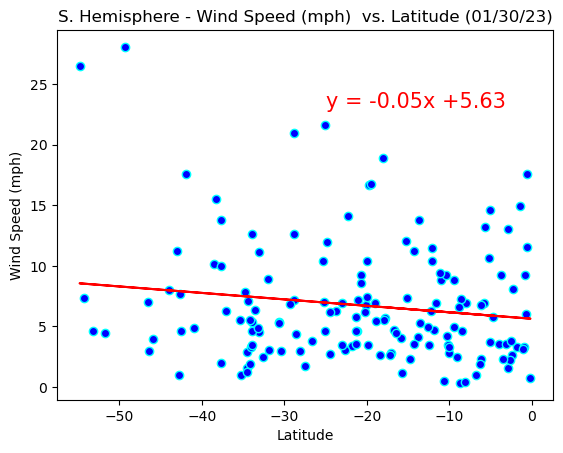

In [22]:
# Southern Hemisphere
# YOUR CODE HERE
x_vals = southern_hemi_df["Lat"]
y_vals = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
regress_vals = x_vals * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_vals,y_vals, facecolor="blue", edgecolor="aqua")
plt.plot(x_vals,regress_vals,"r-")
plt.title("S. Hemisphere - Wind Speed (mph)  vs. Latitude (01/30/23)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(-25,23),fontsize=15,color="red")

print(f"The r-value is: {rvalue**2}")
print("There is a slightly negative correlation between wind speed and latitude for cities in the southern hemisphere.")

plt.savefig("shem_wind_v_lat_plot.png")
